In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
sns.set()

In [2]:
df=pd.read_csv('carsdata.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [4]:
#as we can see therre are many null values,as  we r replacing nan numeric values with mean

In [5]:
df.head(2)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0


In [6]:
df['Length']=df['Length'].fillna(df['Length'].mean())

In [7]:
df['Width']=df['Width'].fillna(df['Width'].mean())

In [8]:
df['Height']=df['Height'].fillna(df['Height'].mean())
df['Seating Capacity']=df['Seating Capacity'].fillna(df['Seating Capacity'].mean())

In [9]:
df['Fuel Tank Capacity']=df['Fuel Tank Capacity'].fillna(df['Fuel Tank Capacity'].mean())

In [10]:
#now we are replacing nan categorical value with mode
#most repeating value

In [11]:
df['Engine'].mode()[0]

'1197 cc'

In [12]:
df['Engine']=df['Engine'].fillna(df['Engine'].mode()[0])

In [13]:
df['Max Power'].fillna( df['Max Power'].mode()[0],inplace=True)

In [14]:
df['Max Torque'].fillna( df['Max Torque'].mode()[0],inplace=True)

In [15]:
df['Drivetrain'].fillna(df['Drivetrain'].mode()[0],inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              2059 non-null   object 
 12  Max Power           2059 non-null   object 
 13  Max Torque          2059 non-null   object 
 14  Drivetrain          2059 non-null   object 
 15  Length              2059 non-null   float64
 16  Width 

In [17]:
#missing values had been filled

In [18]:
#data visulazition----------------------------------------------------------------------------------------------------

In [19]:
top10_models_year=pd.DataFrame(df.groupby(['Year','Make']).count()['Model']).reset_index().sort_values('Model',ascending=False)

In [20]:
top_10_models=top10_models_year[:10]
top_10_models


,Year,Make,Model
160,2017,Maruti Suzuki,74
184,2018,Maruti Suzuki,58
207,2019,Maruti Suzuki,56
176,2018,Hyundai,44
199,2019,Hyundai,42
136,2016,Maruti Suzuki,42
118,2015,Maruti Suzuki,41
100,2014,Maruti Suzuki,38
132,2016,Hyundai,36
152,2017,Hyundai,35


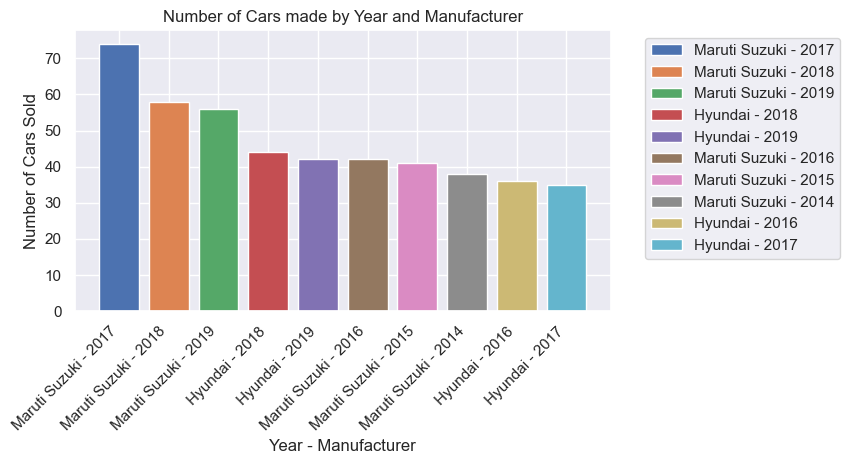

In [21]:
for index, row in top_10_models.iterrows():
    label = f"{row['Make']} - {row['Year']}"
    plt.bar(label, row['Model'], label=label)

# Adding labels and title
plt.xlabel('Year - Manufacturer')
plt.ylabel('Number of Cars Sold')
plt.title('Number of Cars made by Year and Manufacturer')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Adding legend
plt.legend(bbox_to_anchor=(1.05, 1))

# Displaying the plot
plt.show()

In [22]:
# top 10  number of cars made by manufacturer as per year
#Maruti Suzuki at year 2017 had made most number of model of cars over all the dataset

In [23]:
fuel_wise_price=pd.DataFrame(df.groupby('Fuel Type').sum()['Price']).sort_values('Price',ascending=False).reset_index()

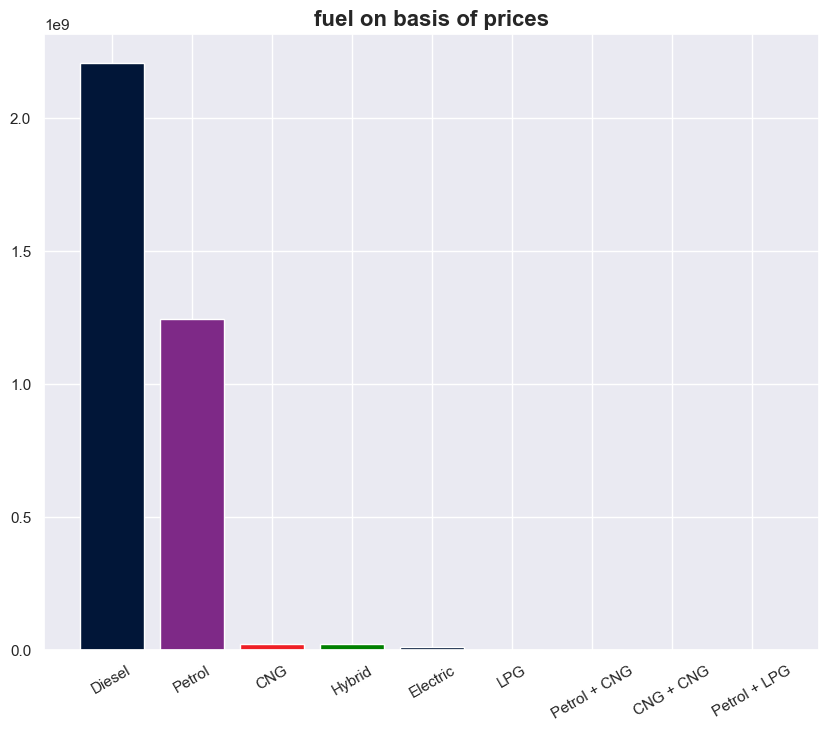

In [24]:
plt.figure(figsize=(10,8))
plt.bar(x=fuel_wise_price['Fuel Type'],height=fuel_wise_price['Price'],
                                                              
        color =["#011638", "#7e2987", "#ef2026","green"])

plt.title("fuel on basis of prices",fontsize=16,fontweight="bold")
plt.xticks(rotation=30)

plt.show()

In [25]:
#according to this bar chart,Diesel cars are made more as compare to other fuels type

In [26]:
sold_color=pd.DataFrame(df.groupby('Color').count()['Make']).sort_values('Make',ascending=False).reset_index()

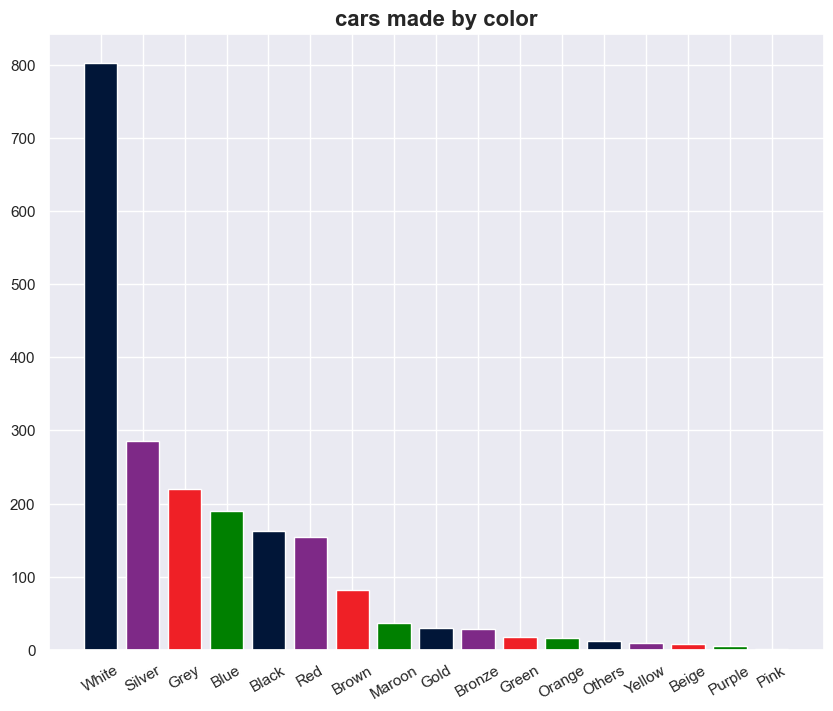

In [27]:
plt.figure(figsize=(10,8))
plt.bar(x=sold_color['Color'],height=sold_color['Make'],
                                                              
        color =["#011638", "#7e2987", "#ef2026","green"])

plt.title("cars made by color",fontsize=16,fontweight="bold")
plt.xticks(rotation=30)

plt.show()

In [28]:
#according to above bar chart we can observe that most car were made of white color 

In [29]:
#dealing with outliers

<Axes: >

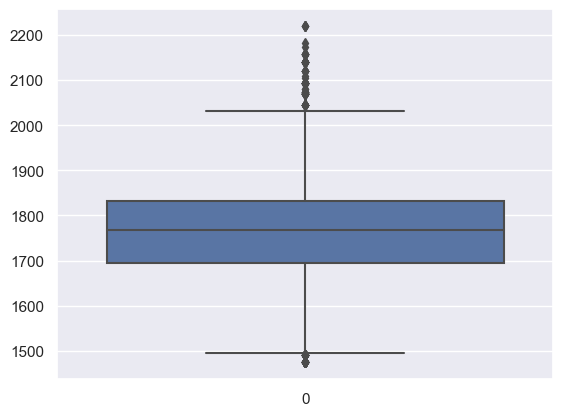

In [30]:
sns.boxplot(df['Width'])

In [31]:
q1=df['Width'].quantile(0.25)
q3=df['Width'].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)

1695.0 1831.0 136.0


In [32]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
print(upper_limit,lower_limit)

2035.0 1491.0


In [33]:
#capping --changing the outlier value to upper or lower limit
new_df=df.copy()
new_df.loc[new_df['Width']>upper_limit,'Width']=upper_limit
new_df.loc[new_df['Width']<lower_limit,'Width']=lower_limit

<Axes: >

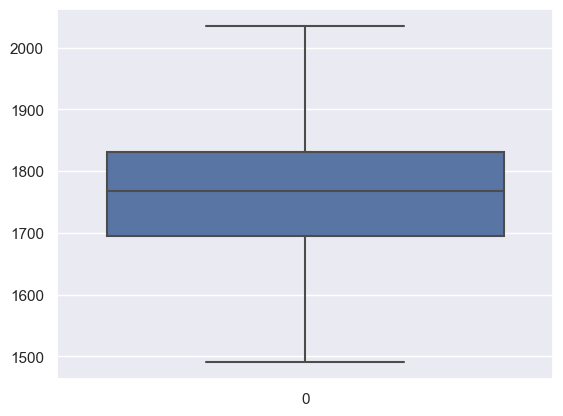

In [34]:
sns.boxplot(new_df['Width'])

<Axes: >

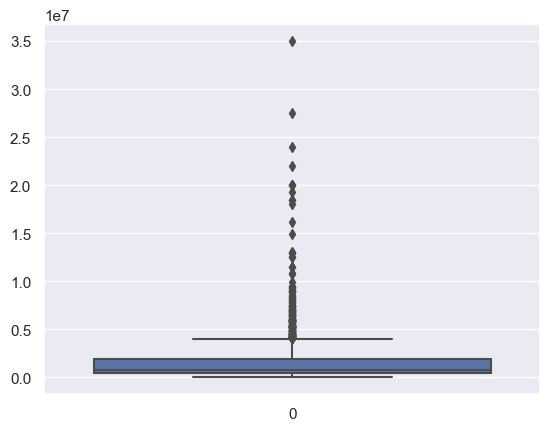

In [35]:
sns.boxplot(df['Price'])

In [36]:
q1=df['Price'].quantile(0.25)
q3=df['Price'].quantile(0.75)
iqr=q3-q1

In [37]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
print(upper_limit,lower_limit)

4085001.5 -1675002.5


In [38]:
new_df.loc[new_df['Price']<lower_limit,'Price']=lower_limit
new_df.loc[new_df['Price']>upper_limit,'Price']=upper_limit

<Axes: >

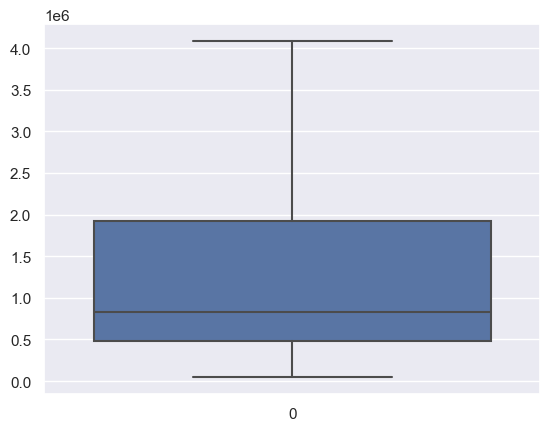

In [39]:
sns.boxplot(new_df['Price'])

In [40]:
df=new_df

In [41]:
#data transformation

In [42]:
df['Location'].unique()

array(['Pune', 'Ludhiana', 'Lucknow', 'Mangalore', 'Mumbai', 'Coimbatore',
       'Bangalore', 'Delhi', 'Raipur', 'Kanpur', 'Patna', 'Vadodara',
       'Hyderabad', 'Yamunanagar', 'Gurgaon', 'Jaipur', 'Deoghar', 'Agra',
       'Goa', 'Warangal', 'Jalandhar', 'Noida', 'Ahmedabad', 'Mohali',
       'Navi Mumbai', 'Ghaziabad', 'Kolkata', 'Zirakpur', 'Nagpur',
       'Thane', 'Faridabad', 'Ranchi', 'Chandigarh', 'Amritsar',
       'Chennai', 'Udupi', 'Panvel', 'Jamshedpur', 'Aurangabad',
       'Rudrapur', 'Nashik', 'Varanasi', 'Salem', 'Dehradun', 'Valsad',
       'Haldwani', 'Dharwad', 'Surat', 'Indore', 'Karnal', 'Panchkula',
       'Mysore', 'Rohtak', 'Ambala Cantt', 'Samastipur', 'Unnao',
       'Purnea', 'Bhubaneswar', 'Kheda', 'Kollam', 'Meerut', 'Ernakulam',
       'Kharar', 'Mirzapur', 'Bhopal', 'Gorakhpur', 'Guwahati',
       'Allahabad', 'Muzaffurpur', 'Faizabad', 'Kota', 'Pimpri-Chinchwad',
       'Dak. Kannada', 'Ranga Reddy', 'Bulandshahar', 'Roorkee',
       'Siliguri'], dty

In [43]:
north_india = np.array(['Delhi', 'Lucknow', 'Kanpur', 'Ghaziabad', 'Noida', 'Varanasi', 'Agra', 'Allahabad', 'Meerut', 'Gorakhpur', 'Faizabad', 'Bulandshahar', 'Ludhiana', 'Jalandhar', 'Ambala Cantt', 'Panchkula', 'Karnal', 'Rohtak', 'Unnao', 'Purnea', 'Muzaffurpur', 'Faridabad', 'Raipur', 'Yamunanagar', 'Gurgaon', 'Mohali', 'Zirakpur', 'Chandigarh', 'Amritsar', 'Rudrapur', 'Dehradun', 'Valsad', 'Haldwani', 'Samastipur', 'Kheda', 'Kharar', 'Mirzapur', 'Guwahati', 'Kota', 'Dak. Kannada', 'Roorkee'])
south_india = np.array(['Bangalore', 'Mangalore', 'Udupi', 'Chennai', 'Coimbatore', 'Salem', 'Hyderabad', 'Warangal','Goa','Ernakulam', 'Kollam', 'Pondicherry', 'Mysore'])
east_india = np.array(['Kolkata', 'Patna', 'Deoghar', 'Ranchi', 'Jamshedpur', 'Siliguri', 'Bhubaneswar', 'Guwahati'])
west_india=np.array(['Mumbai', 'Panvel', 'Nashik', 'Dharwad','Pune', 'Navi Mumbai', 'Thane', 'Nagpur', 'Aurangabad', 'Ahmedabad', 'Vadodara', 'Surat', 'Jaipur', 'Indore', 'Bhopal', 'Pimpri-Chinchwad', 'Ranga Reddy'
                    ])


In [44]:
df['Location']=np.where(np.isin(df['Location'],west_india),'west_india',df['Location'])
#basically it is if-else
df['Location']=np.where(np.isin(df['Location'],south_india),"south_india",df['Location'])
df['Location']=np.where(np.isin(df['Location'],east_india),"east_india",df['Location'])
df['Location']=np.where(np.isin(df['Location'],north_india),"north_india",df['Location'])
df['Location']
#np.isin(dataset,array_of data)--gives boolean value

0        west_india
1       north_india
2       north_india
3       south_india
4        west_india
           ...     
2054     west_india
2055     west_india
2056     west_india
2057    south_india
2058     east_india
Name: Location, Length: 2059, dtype: object

In [45]:
df['Location'].unique()

array(['west_india', 'north_india', 'south_india', 'east_india'],
      dtype=object)

In [46]:
df['Owner'].unique()

array(['First', 'Second', 'Third', 'Fourth', 'UnRegistered Car',
       '4 or More'], dtype=object)

In [47]:
df['Owner']=np.where(df['Owner']=='Fourth','4 or More',df['Owner'])
df['Owner'].unique()

array(['First', 'Second', 'Third', '4 or More', 'UnRegistered Car'],
      dtype=object)

In [48]:
mapping={
    'First':5, 'Second':4, 'Third':3, '4 or More':2, 'UnRegistered Car':1
}
#replace

In [49]:
df['Owner']=df['Owner'].map(mapping)
df['Owner']

0       5
1       4
2       5
3       5
4       5
       ..
2054    5
2055    4
2056    5
2057    5
2058    5
Name: Owner, Length: 2059, dtype: int64

In [50]:
df['Owner'].unique()

array([5, 4, 3, 2, 1], dtype=int64)

In [51]:
df['Color'].unique()

array(['Grey', 'White', 'Maroon', 'Red', 'Blue', 'Orange', 'Silver',
       'Brown', 'Black', 'Bronze', 'Gold', 'Beige', 'Green', 'Yellow',
       'Purple', 'Others', 'Pink'], dtype=object)

In [52]:
color_mapping = {
    'Grey': 'Neutral',
    'White': 'Neutral',
    'Silver': 'Neutral',
    'Black': 'Neutral',
    'Maroon': 'Warm',
    'Red': 'Warm',
    'Orange': 'Warm',
    'Brown': 'Warm',
    'Bronze': 'Warm',
    'Gold': 'Warm',
    'Beige': 'Warm',
    'Yellow': 'Warm',
    'Pink': 'Warm',
    'Blue': 'Cool',
    'Green': 'Cool',
    'Purple': 'Cool',
    'Others': 'Others'
}

In [53]:
df['Color']=df['Color'].map(color_mapping)
df['Color'].unique()

array(['Neutral', 'Warm', 'Cool', 'Others'], dtype=object)

In [54]:
df['Fuel Type'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric', 'CNG + CNG',
       'Hybrid', 'Petrol + CNG', 'Petrol + LPG'], dtype=object)

In [55]:
df['Fuel Type']=np.where(np.isin(df['Fuel Type'],['CNG + CNG',
       'Hybrid', 'Petrol + CNG', 'Petrol + LPG']),"others",df['Fuel Type'])

In [56]:
df['Fuel Type']=np.where(df['Fuel Type'].isin(['Petrol', 'Diesel', 'CNG', 'LPG','others']),"non-electric",df['Fuel Type'])

In [57]:
df['Fuel Type'].unique()

array(['non-electric', 'Electric'], dtype=object)

In [58]:
color=pd.get_dummies(df['Color'],dtype=int)
#makes new column 

In [59]:
color

,Cool,Neutral,Others,Warm
0,0,1,0,0
1,0,1,0,0
2,0,0,0,1
3,0,0,0,1
4,0,1,0,0
...,...,...,...,...
2054,0,1,0,0
2055,0,1,0,0
2056,0,1,0,0
2057,0,1,0,0


In [60]:
label_encoder=LabelEncoder()
df['Fuel Type']=label_encoder.fit_transform(df['Fuel Type'])

In [61]:
df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000.0,2017,87150,1,Manual,west_india,Neutral,5,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.00000
1,Maruti Suzuki,Swift DZire VDI,450000.0,2014,75000,1,Manual,north_india,Neutral,4,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.00000
2,Hyundai,i10 Magna 1.2 Kappa2,220000.0,2011,67000,1,Manual,north_india,Warm,5,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.00000
3,Toyota,Glanza G,799000.0,2019,37500,1,Manual,south_india,Warm,5,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.00000
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000.0,2018,69000,1,Manual,west_india,Neutral,5,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000.0,2016,90300,1,Manual,west_india,Neutral,5,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.00000
2055,Hyundai,Eon D-Lite +,275000.0,2014,83000,1,Manual,west_india,Neutral,4,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.00000
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000.0,2013,73000,1,Manual,west_india,Neutral,5,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.00000
2057,BMW,5-Series 520d Luxury Line [2017-2019],4085001.5,2018,60474,1,Automatic,south_india,Neutral,5,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.00000


In [62]:
aut_man=pd.get_dummies(df['Transmission'],dtype=int)
aut_man


,Automatic,Manual
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
2054,0,1
2055,0,1
2056,0,1
2057,1,0


In [63]:
df.drop(['Model','Make'],axis=1,inplace =True)

In [64]:
df

,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,505000.0,2017,87150,1,Manual,west_india,Neutral,5,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.00000
1,450000.0,2014,75000,1,Manual,north_india,Neutral,4,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.00000
2,220000.0,2011,67000,1,Manual,north_india,Warm,5,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.00000
3,799000.0,2019,37500,1,Manual,south_india,Warm,5,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.00000
4,1950000.0,2018,69000,1,Manual,west_india,Neutral,5,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,850000.0,2016,90300,1,Manual,west_india,Neutral,5,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.00000
2055,275000.0,2014,83000,1,Manual,west_india,Neutral,4,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.00000
2056,240000.0,2013,73000,1,Manual,west_india,Neutral,5,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.00000
2057,4085001.5,2018,60474,1,Automatic,south_india,Neutral,5,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.00000


In [65]:
df['Transmission']=label_encoder.fit_transform(df['Transmission'])

In [66]:
df['Location']=label_encoder.fit_transform(df['Location'])
df['Color']=label_encoder.fit_transform(df['Color'])
df['Seller Type']=label_encoder.fit_transform(df['Seller Type'])
df['Engine']=label_encoder.fit_transform(df['Engine'])
df['Max Power']=label_encoder.fit_transform(df['Max Power'])
df['Max Torque']=label_encoder.fit_transform(df['Max Torque'])
df['Drivetrain']=label_encoder.fit_transform(df['Drivetrain'])
df

,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,505000.0,2017,87150,1,1,3,1,5,1,7,312,5,1,3990.0,1680.0,1505.0,5.0,35.00000
1,450000.0,2014,75000,1,1,1,1,4,2,9,289,77,1,3995.0,1695.0,1555.0,5.0,42.00000
2,220000.0,2011,67000,1,1,1,3,5,2,6,301,11,1,3585.0,1595.0,1550.0,5.0,35.00000
3,799000.0,2019,37500,1,1,2,3,5,2,6,305,15,1,3995.0,1745.0,1510.0,5.0,37.00000
4,1950000.0,2018,69000,1,1,3,1,5,2,60,78,167,2,4735.0,1830.0,1795.0,7.0,55.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,850000.0,2016,90300,1,1,3,1,5,2,55,66,162,1,4585.0,1890.0,1785.0,7.0,70.00000
2055,275000.0,2014,83000,1,1,3,1,4,2,103,247,264,1,3495.0,1550.0,1500.0,5.0,32.00000
2056,240000.0,2013,73000,1,1,3,1,5,2,5,283,1,1,3795.0,1680.0,1427.0,5.0,45.00000
2057,4085001.5,2018,60474,1,0,2,1,5,2,47,144,199,2,4936.0,1868.0,1479.0,5.0,65.00000


In [67]:
df.corr()

,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
Price,1.000000,0.413639,-0.161233,-4.704586e-03,-0.657325,0.103867,-0.152271,-0.038362,-0.081395,0.263488,-0.273789,0.418011,-0.088509,0.699292,0.706302,0.126038,0.071341,6.742099e-01
Year,0.413639,1.000000,-0.296547,-7.449132e-02,-0.171883,0.022422,-0.081378,0.221210,-0.037500,0.027556,-0.143925,0.007218,-0.033902,0.093534,0.192274,0.109947,-0.006029,6.054809e-02
Kilometer,-0.161233,-0.296547,1.000000,3.501652e-02,0.104907,-0.043974,-0.024096,-0.058000,0.025995,-0.014592,-0.049037,0.004204,0.004771,0.047473,0.020533,0.093136,0.124634,5.541805e-02
Fuel Type,-0.004705,-0.074491,0.035017,1.000000e+00,0.064606,-0.030482,0.055838,-0.025744,-0.009970,0.062685,-0.068891,0.029267,0.002593,0.032462,-0.003568,0.002128,0.022109,1.318156e-16
Transmission,-0.657325,-0.171883,0.104907,6.460555e-02,1.000000,-0.185570,0.094997,0.059760,0.065903,-0.187938,0.281888,-0.290972,0.067444,-0.537109,-0.525136,0.059612,0.044407,-4.933609e-01
Location,0.103867,0.022422,-0.043974,-3.048187e-02,-0.185570,1.000000,0.035135,0.014385,-0.060638,0.012371,-0.034238,-0.020757,-0.042197,0.048617,0.048047,-0.083069,-0.087025,3.431839e-02
Color,-0.152271,-0.081378,-0.024096,5.583813e-02,0.094997,0.035135,1.000000,0.028818,-0.011031,-0.008439,0.030148,-0.067097,0.033841,-0.119299,-0.145556,-0.075815,-0.066181,-1.472354e-01
Owner,-0.038362,0.221210,-0.058000,-2.574395e-02,0.059760,0.014385,0.028818,1.000000,-0.054334,-0.044328,0.013363,-0.082699,0.004698,-0.081763,-0.043882,-0.002439,-0.033382,-7.420283e-02
Seller Type,-0.081395,-0.037500,0.025995,-9.970080e-03,0.065903,-0.060638,-0.011031,-0.054334,1.000000,0.000940,0.037461,-0.015012,0.012329,-0.052252,-0.045384,0.020169,0.030233,-3.944367e-02
Engine,0.263488,0.027556,-0.014592,6.268534e-02,-0.187938,0.012371,-0.008439,-0.044328,0.000940,1.000000,-0.236128,0.756532,-0.025223,0.143016,0.037609,0.203740,0.157298,2.504888e-01
